 MAE: 32.9625148439427
MSE: 1553.0137828738752
R2: 0.9885433409460124


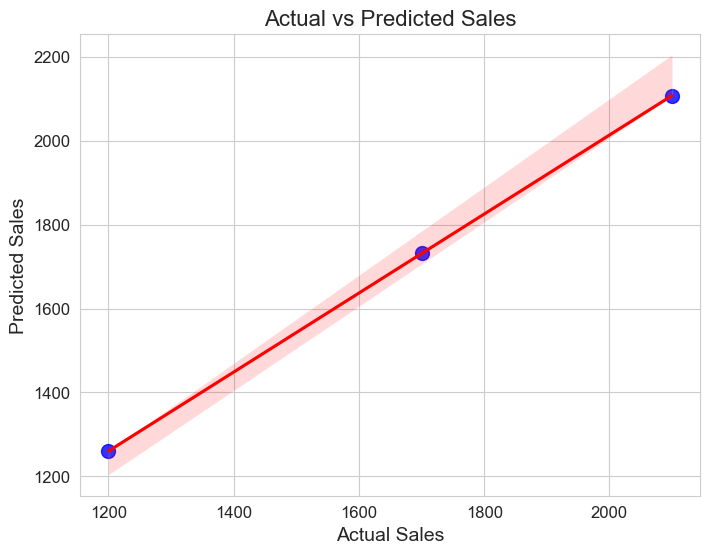

Predicted Sales for New Data: 2290.992807689722


In [1]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Defining The Data
data = {
    'Advertising_Budget':[200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700],
    'Promotion_Spending': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    'Competitor_Advertising': [300, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410],
    'Sales': [1200, 1350, 1400, 1600, 1650, 1700, 1850, 1900, 2000, 2100, 2200]
}


# Preparing Our Data
df = pd.DataFrame(data)


# Extracting Our Feature Variables From Data
x = df[['Advertising_Budget', 'Promotion_Spending', 'Competitor_Advertising']]
        
        
# Extracting Our Target Variable From Data
y = df['Sales']


# Splitting Our Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


# Building Our Linear Regression Model
model = LinearRegression()


# Training Our Model on Data
model.fit(x_train, y_train)


# Making Prediction on Our Trained Model
y_pred = model.predict(x_test)


# Evaluating Our Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f' MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')
      
      
# Creating Our Visualization
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
      
      
# Actual vs Predicted Sales
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 100, 'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
      

# Making Prediction From New Data
new_data = pd.DataFrame({
    'Advertising_Budget': [750],
    'Promotion_Spending': [160],
    'Competitor_Advertising': [410]   
})
      
predicted_sales = model.predict(new_data)
print(f'Predicted Sales for New Data: {predicted_sales[0]}')

      

## Saving Model

In [2]:
import pickle

# Save the model using pickle
with open('sales_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)